In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Keras functions
from keras.models import Sequential
# from keras.layers import Dense, Activation, Flatten
# from keras.layers import Conv2D, MaxPool2D
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Activation,Dropout,Flatten
from keras.optimizers import SGD

from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras  
from keras.optimizers import Adam


# Keras dataset
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train[1234].shape

(28, 28)

In [0]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [6]:
x_train[1234].shape

(28, 28, 1)

In [0]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
model = Sequential()

## 原來模型 model1  <font color=red size=6>   accuracy = 0.94 </font> 

In [10]:
# Convolution 1
model.add(Conv2D(4,(5,5),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPool2D(pool_size=(2,2)))


# Convolution 2
model.add(Conv2D(8,(5,5),padding='same'))
model.add(Activation('relu'))
# 再Max-Pooling
model.add(MaxPool2D(pool_size=(2,2)))

# Convolution 3
model.add(Conv2D(16,(5,5),padding='same'))
model.add(Activation('relu'))
# 再Max-Pooling
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(9))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.07),metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          3216      
__________

In [0]:
# hyperparamters
epochs = 10 

In [14]:
model_conv = model.fit(x_train,y_train,batch_size=100, epochs=epochs)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0890 - acc: 0.1778
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0825 - acc: 0.3265
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0626 - acc: 0.5096
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0383 - acc: 0.7409
Epoch 5/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0201 - acc: 0.8694
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0151 - acc: 0.9017
Epoch 7/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0126 - acc: 0.9179
Epoch 8/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0109 - acc: 0.9291
Epoch 9/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0097 - acc: 0.9375
Epoch 10/10
60000/60000 [===========================

<function matplotlib.pyplot.show>

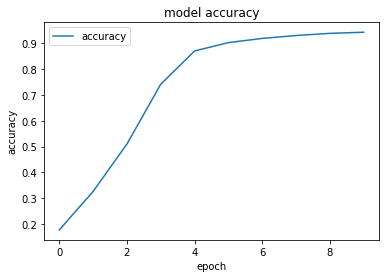

In [15]:
plt.plot(model_conv.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show

# 建立可調參數及 模型 model2  - >  調整filter to 8
<br>
<font color=red size=6>  Accuracy = 0.90 </font>  


In [0]:
# hyperparamters
batch_size = 100     # Def 100
filters1 = 8          # Def 4
filters2 = filters1*2 
Flat_Dense = 9       # Def 9
SGDlr = 0.07         # Def 0.07
kernelsize = (5, 5) # Def 5,5

In [0]:
model2 = Sequential()

# Convolution 1
model2.add(Conv2D(filters1,kernelsize,padding='same',input_shape=(28,28,1)))
model2.add(Activation('relu'))
# Max-Pooling
model2.add(MaxPool2D(pool_size=(2,2)))


# Convolution 2
model2.add(Conv2D(filters2,kernelsize,padding='same'))
model2.add(Activation('relu'))
# 再Max-Pooling
model2.add(MaxPool2D(pool_size=(2,2)))

# Convolution 3
model2.add(Conv2D(filters2*2,kernelsize,padding='same'))
model2.add(Activation('relu'))
# 再Max-Pooling
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(Flat_Dense))
model2.add(Activation('relu'))

model2.add(Dense(10))
model2.add(Activation('softmax'))


In [0]:
model2.compile(loss='mse', optimizer=SGD(lr=0.07),metrics=['accuracy'])

In [19]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        3216      
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          12832     
__________

In [20]:
model2_conv = model2.fit(x_train,y_train,batch_size=batch_size, epochs=epochs)

Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0899 - acc: 0.1382
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0896 - acc: 0.1862
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0890 - acc: 0.2044
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0873 - acc: 0.2206
Epoch 5/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0796 - acc: 0.2531
Epoch 6/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0661 - acc: 0.4126
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0509 - acc: 0.5625
Epoch 8/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0397 - acc: 0.6814
Epoch 9/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0243 - acc: 0.8412
Epoch 10/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0152 - acc: 0.9041

<function matplotlib.pyplot.show>

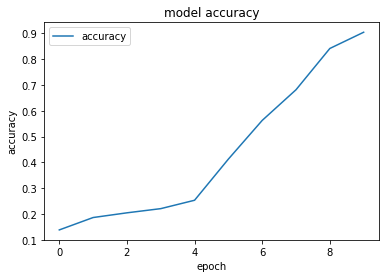

In [21]:
plt.plot(model2_conv.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show

# 模型 model3 
## 調整filter to 8 & batch_size to 200 精確度大幅下降!
<br>
<font color=red size=6>  Accuracy = 0.65 </font>  

In [0]:
# hyperparamters
batch_size = 200     # Def 100
filters1 = 8          # Def 4
filters2 = filters1*2 
Flat_Dense = 9       # Def 9
SGDlr = 0.07         # Def 0.07
kernelsize = (5, 5) # Def 5,5

In [0]:
model3 = Sequential()

# Convolution 1
model3.add(Conv2D(filters1,kernelsize,padding='same',input_shape=(28,28,1)))
model3.add(Activation('relu'))
# Max-Pooling
model3.add(MaxPool2D(pool_size=(2,2)))


# Convolution 2
model3.add(Conv2D(filters2,kernelsize,padding='same'))
model3.add(Activation('relu'))
# 再Max-Pooling
model3.add(MaxPool2D(pool_size=(2,2)))

# Convolution 3
model3.add(Conv2D(filters2*2,kernelsize,padding='same'))
model3.add(Activation('relu'))
# 再Max-Pooling
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Flatten())
model3.add(Dense(Flat_Dense))
model3.add(Activation('relu'))

model3.add(Dense(10))
model3.add(Activation('softmax'))

model3.compile(loss='mse', optimizer=SGD(lr=0.07),metrics=['accuracy'])

In [24]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 16)        3216      
_________________________________________________________________
activation_12 (Activation)   (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 32)          12832     
__________

In [25]:
model3_conv = model3.fit(x_train,y_train,batch_size=batch_size, epochs=epochs)

Epoch 1/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0898 - acc: 0.1620
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0894 - acc: 0.2000
Epoch 3/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0890 - acc: 0.2187
Epoch 4/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0884 - acc: 0.2666
Epoch 5/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0872 - acc: 0.3300
Epoch 6/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0850 - acc: 0.3656
Epoch 7/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0801 - acc: 0.3784
Epoch 8/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0719 - acc: 0.4490
Epoch 9/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0589 - acc: 0.5758
Epoch 10/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0479 - acc: 0.6549

<function matplotlib.pyplot.show>

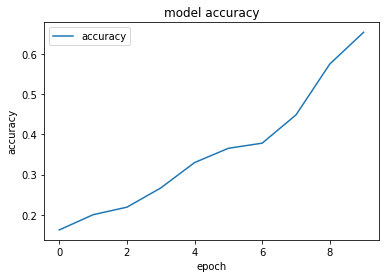

In [26]:
plt.plot(model3_conv.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show

#  模型 model4 
## 調整filter to 8 & batch_size to 200  精確度更糟!
## 增加 Flat_Dense 到 32
## 減少 kernelsize  到  3x3 
<br>
<font color=red size=6>  Accuracy = 0.17 </font>  

In [0]:
# hyperparamters
batch_size = 200     # Def 100
filters1 = 8          # Def 4
filters2 = filters1*2 
Flat_Dense = 32       # Def 9
SGDlr = 0.07         # Def 0.07
kernelsize = (3, 3) # Def 5,5

In [0]:
model4 = Sequential()

# Convolution 1
model4.add(Conv2D(filters1,kernelsize,padding='same',input_shape=(28,28,1)))
model4.add(Activation('relu'))
# Max-Pooling
model4.add(MaxPool2D(pool_size=(2,2)))


# Convolution 2
model4.add(Conv2D(filters2,kernelsize,padding='same'))
model4.add(Activation('relu'))
# 再Max-Pooling
model4.add(MaxPool2D(pool_size=(2,2)))

# Convolution 3
model4.add(Conv2D(filters2*2,kernelsize,padding='same'))
model4.add(Activation('relu'))
# 再Max-Pooling
model4.add(MaxPool2D(pool_size=(2,2)))

model4.add(Flatten())
model4.add(Dense(Flat_Dense))
model4.add(Activation('relu'))

model4.add(Dense(10))
model4.add(Activation('softmax'))

model4.compile(loss='mse', optimizer=SGD(lr=0.07),metrics=['accuracy'])
# model4.compile(Adam(lr=0.0003),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [29]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
activation_16 (Activation)   (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
activation_17 (Activation)   (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 32)          4640      
__________

In [30]:
model4_conv = model4.fit(x_train,y_train,batch_size=batch_size, epochs=epochs)

Epoch 1/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0902 - acc: 0.0753
Epoch 2/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0900 - acc: 0.0959
Epoch 3/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0899 - acc: 0.1429
Epoch 4/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0898 - acc: 0.1535
Epoch 5/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0897 - acc: 0.1533
Epoch 6/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0896 - acc: 0.1488
Epoch 7/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0895 - acc: 0.1435
Epoch 8/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0894 - acc: 0.1464
Epoch 9/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0892 - acc: 0.1601
Epoch 10/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.0888 - acc: 0.1735

<function matplotlib.pyplot.show>

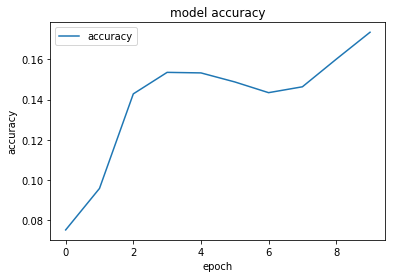

In [31]:
plt.plot(model4_conv.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show

# 調回調參數model5  - >  調回原來Model1 參數，只調整 filter to 8，改變loss function and optimizer ， 明顯提升精確度，相當關鍵
<br>
<font color=red size=6>  Accuracy = 0.977 </font>  

In [0]:
# hyperparamters
batch_size = 100     # Def 100
filters1 = 8          # Def 4
filters2 = filters1*2 
Flat_Dense = 9       # Def 9
SGDlr = 0.07         # Def 0.07
kernelsize = (5, 5) # Def 5,5

In [0]:
model5 = Sequential()

# Convolution 1
model5.add(Conv2D(filters1,kernelsize,padding='same',input_shape=(28,28,1)))
model5.add(Activation('relu'))
# Max-Pooling
model5.add(MaxPool2D(pool_size=(2,2)))


# Convolution 2
model5.add(Conv2D(filters2,kernelsize,padding='same'))
model5.add(Activation('relu'))
# 再Max-Pooling
model5.add(MaxPool2D(pool_size=(2,2)))

# Convolution 3
model5.add(Conv2D(filters2*2,kernelsize,padding='same'))
model5.add(Activation('relu'))
# 再Max-Pooling
model5.add(MaxPool2D(pool_size=(2,2)))

model5.add(Flatten())
model5.add(Dense(Flat_Dense))
model5.add(Activation('relu'))

model5.add(Dense(10))
model5.add(Activation('softmax'))

# model5.compile(loss='mse', optimizer=SGD(lr=0.07),metrics=['accuracy'])
model5.compile(Adam(lr=0.0003),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [34]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 8)         208       
_________________________________________________________________
activation_21 (Activation)   (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 16)        3216      
_________________________________________________________________
activation_22 (Activation)   (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 32)          12832     
__________

In [35]:
model5_conv = model5.fit(x_train,y_train,batch_size=batch_size, epochs=epochs)

Epoch 1/10
60000/60000 [==============================] - 3s 58us/step - loss: 1.1539 - acc: 0.5670
Epoch 2/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.2953 - acc: 0.9244
Epoch 3/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.1935 - acc: 0.9478
Epoch 4/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.1524 - acc: 0.9587
Epoch 5/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.1280 - acc: 0.9645
Epoch 6/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.1127 - acc: 0.9694
Epoch 7/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1032 - acc: 0.9708
Epoch 8/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.0912 - acc: 0.9744
Epoch 9/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.0833 - acc: 0.9762
Epoch 10/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.0774 - acc: 0.9779

<function matplotlib.pyplot.show>

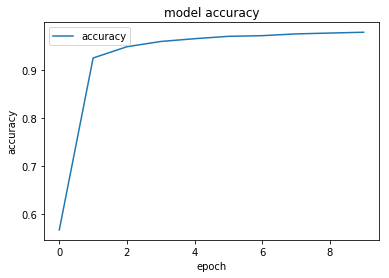

In [36]:
plt.plot(model5_conv.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show